#     Plot maps

## Setup imports

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import notebook_prepare as pre

## Define plotting function

Now that we've set up the imports, we can define the function producing the plots that we'll use later.

In [22]:
def plot_track(df,plotdir,outcome) :

    """
    Plot maps of aircraft track.
    """

    # Define the figure.
    fig = plt.figure(figsize=(25,15))
    ax4 = pre.setup_map(fig,1,False)

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    alt_data = df['Altitude'][:]

    # Plot the data.
    plt4 = ax4.scatter(lon_data,lat_data,s=200,c=alt_data,cmap=plt.cm.summer,ec='black',zorder=3,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb4 = plt.colorbar(plt4,ax=ax4,orientation='vertical',pad=0.1,extend='both')
    cb4.ax.tick_params(labelsize=20)
    cb4.set_label('Altitude / m',fontsize=20,labelpad=10)

    if outcome == 'show':
        plt.show()

    elif outcome == 'save':
        plt.savefig(plotdir+key+'_Map_Track.png')
        plt.close()

In [23]:
def plot_maps(df,plotdir,key,outcome,label,model) :

    """
    Plot maps of aircraft data.
    """

    # Define the figure.
    fig = plt.figure(figsize=(25,15))
    ax0 = pre.setup_map(fig,1,model)
    ax0.set_title('Aircraft',fontsize=40)

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    data = pre.read_data_values(df, model)

    # Determine the minimum and maximum values.
    if(model):
        min = np.nanmin([np.nanmin(data['a_avg']),np.nanmin(data['m_avg'])])
        max = np.nanmax([np.nanmax(data['a_avg']),np.nanmax(data['m_avg'])])
    
    else:
        min = np.nanmin(data['a_avg'])
        max = np.nanmax(data['a_avg']) 

    # Plot the data.
    plt0 = ax0.scatter(lon_data,lat_data,s=200,c=data['a_avg'],cmap=plt.cm.Spectral_r,ec='black',vmin=min,vmax=max,zorder=3,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb0 = plt.colorbar(plt0,ax=ax0,orientation='vertical',pad=0.1,extend='both')
    cb0.ax.tick_params(labelsize=20)
    
    if(model):
        """
        Plot maps of model data.
        """

        # Define the figure.
        ax1 = pre.setup_map(fig,2,model)
        ax1.set_title('Model',fontsize=40)

        # Plot the data.
        plt1 = ax1.scatter(lon_data,lat_data,s=200,c=data['m_avg'],cmap=plt.cm.Spectral_r,ec='black',vmin=min,vmax=max,zorder=3,transform=ccrs.PlateCarree())

        # Plot the colourbar.
        cb1 = plt.colorbar(plt1,ax=ax1,orientation='vertical',pad=0.1,extend='both')
        cb1.ax.tick_params(labelsize=20)

        """
        Plot maps of model - observation difference data.
        """

        # Define the figure.
        ax2 = pre.setup_map(fig,3,model)
        ax2.set_title('Difference',fontsize=40)

        # Calculate the difference between model and observations.
        diff_data = [x-y for x,y in zip(data['m_avg'],data['a_avg'])]

        # Determine the min and max.
        min = np.nanmin(diff_data)
        max = np.nanmax(diff_data)
        limits = np.sqrt(np.nanmax([min**2,max**2]))
        min_lim = limits*-1
        max_lim = limits

        # Plot the data.
        plt2 = ax2.scatter(lon_data,lat_data,s=200,c=diff_data,cmap=plt.cm.RdBu_r,ec='black',zorder=3,vmin=min_lim,vmax=max_lim,transform=ccrs.PlateCarree())

        # Plot the colourbar.
        cb2 = plt.colorbar(plt2,ax=ax2,orientation='vertical',pad=0.1,extend='both')
        cb2.ax.tick_params(labelsize=20)
        
    fig.supxlabel(label,fontsize=40, ha="center")    

    if outcome == 'show':
        plt.show()

    elif outcome == 'save':
        plt.savefig(plotdir+key+'_Map.png')
        plt.close()
    

## Specify the flight number & model data

In [24]:
# Set the flight number.
# Current valid options are C110, M270, M296 and M302.
flight_number = 'C110'  

# Specify whether you have model data to plot.
model = True

# Specify whether to save or just display the plots.
# Valid options are 'show' or 'save'.
outcome = 'show'

## Prepare the data and plot for each pollution species

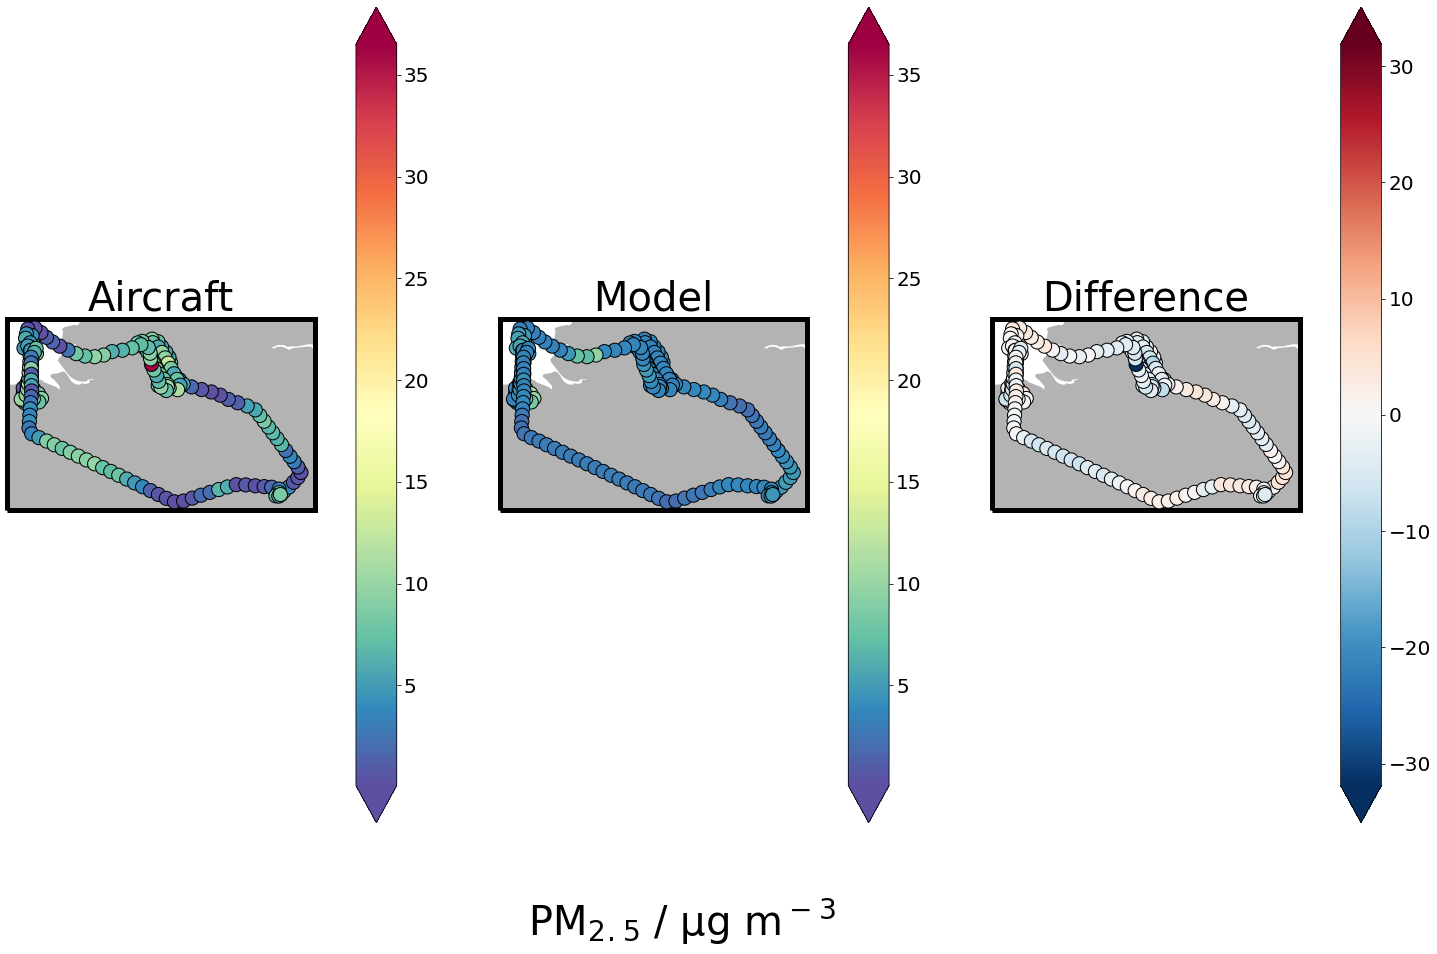

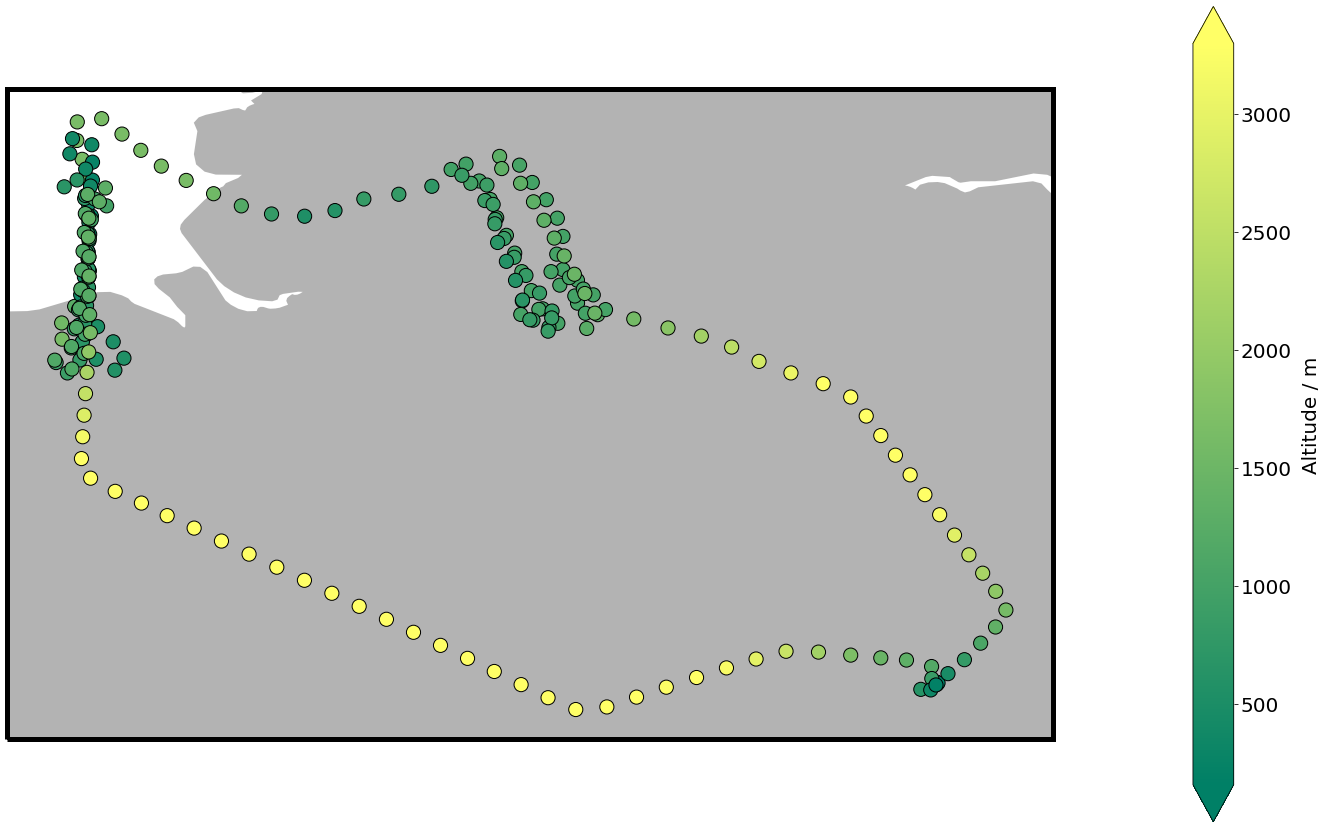

In [25]:
species_dict = pre.species_dictionary(flight_number)
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]

for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)
        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'], model)

    plot_maps(resample_df,setup[5],key,outcome,label,model)

plot_track(resample_df,setup[5],outcome)